## Linear Regression from scratch

Linear regression is a very simple method for machine learning yet is a great starting tool that can be quickly deployed for most needs.

In [1]:
#first we'll need some packages
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
#Lets generate some fake data to play around with
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [10]:
#if we remember from our formula for a single linear regression we need the mean of 
#X and the mean of Y

Xmean = np.mean(df.X)
Ymean = np.mean(df.y)

In [11]:
Xmean

1.6495200388362128

In [12]:
Ymean

2.535862497024783

In [28]:
#The formula for the gradient is the sum((x - Xmean) * (y - Ymean)) / sum(x - Xmean^2)
Weight = sum((df.X - Xmean) * (df.y - Ymean)) / sum((df.X - Xmean)**2)

In [29]:
Weight

0.32293968670927636

In [30]:
#that was our weights but not our bias which was B= ymean - weight*xmean so
Bias = Ymean - Weight * Xmean

In [32]:
Bias

2.003167012462343

So we got our weights and our bias which means we have our linear equation y = 0.323x + 2.003. We can now use this to make predictions:

In [463]:
#make some predictions
Preds = Weight * df.X + Bias

In [464]:
Preds.head()

0    3.911783
1    2.810643
2    3.277760
3    4.296760
4    3.995348
Name: X, dtype: float64

Having these predictions isn't that helpful unless we know how good they are so now what we need to do is calculate the error.

In [ ]:
#lets make a quick plot to see what our predictions look like
plt.figure(figsize=(12, 6))
plt.plot(X, Preds)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [39]:
#well our line looks pretty good but remember our error is the distance between the true point and that line or using the root mean square error 
error = sum(((Preds - df.y)**2)/ df.y.count())

In [41]:
error

0.26429296354765724

Thats actually pretty low so it's a pretty good model. Not surprising as it was made with fake data but if you got something like this in the real world you would be happy.

All this was a bit longwinded so we should be properly pythonic and make everything functions

You have all the code now create a nice LinearRegression() function that gives you the weight bias error and if you want makes a nice plot.

Next step is to write one that works with multiple explanatory variables which means we will need to write a gradient descent algorithm. This is where things get fun. 

first of all we ware going to need some data included in the practicals is a dataframe called plant heights this has a lot of measured plant heights and 
other variables that might impact them, we are going to use this to make a regression that predicts plant height

In [43]:
#import the data
Plants = pd.read_csv("Plant_height.csv")

In [460]:
Plants.shape

(178, 35)

In [459]:
#This is a pretty big dataset with 35 variables including
Plants['height'].head()

0    28.0
1    26.6
2     0.3
3     1.6
4     0.2
Name: height, dtype: float64

In [411]:
#We're going to see how height varies with altitude, temperature and rainfall the first thing we will need ot do is make an array of weights
X = np.array([np.ones(len(Plants['loght'])),Plants['alt'],Plants['rain'],Plants['temp']]).T

In [412]:
#The Y variable is plant heights
Y = np.array(Plants['height'])

In [413]:
#we initialise our starting weights / gradients to 0 initially
Weights = [0.,0.,0.,0.]

In [432]:
#now we have to set our first hyper parameter the learning rate or alpha (this has been set extremely low as this data is very odd and will not converge if it goes higher)
alpha = 0.0000001

In [415]:
#we should first create a function that calculates the cost of the model we have made
def cost_function(X, Y, Weights):
    m = len(Y)
    J = np.sum((X.dot(Weights) - Y) ** 2)/(2 * m)
    return J

In [416]:
cost_function(X,Y,Weights)

103.39257096143271

In [418]:
#this is pretty high so we need to reduce this step by step using gradient descent this will need it's own function
#the iterations is just how many times we want to improve the weights by
def gradient_descent(X, Y, Weights, alpha, iterations):
    #for nicety we should maintain a record of the cost at each iteration
    cost_history = [0] * iterations
    n = len(Y)
    
    for iteration in range(iterations):
        # #calculate the current predicted y values
        h = X.dot(Weights)
        # Difference b/w predicted and Actual Y
        loss = (h - Y) 
        # Gradient Calculation the loss times the X values * 1/n
        gradient = X.T.dot(loss) / n
        # Changing Values of our weights using Gradient times by a learning rate
        Weights -= alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, Weights)
        cost_history[iteration] = cost
        
    return Weights, cost_history

In [433]:
NewWeights, CH = gradient_descent(X,Y,Weights,alpha,1000)

In [434]:
NewWeights

array([6.99253214e-05, 1.83159599e-03, 5.58355166e-03, 1.08706138e-03])

In [425]:
CH[0]

80.47226805954547

In [426]:
CH[len(CH)-1]

55.66279953802289

In [ ]:
#well we reduced our cost pretty well but got tiny tiny weights so lets run the algorithm for a bit

In [435]:
NewWeights, CH = gradient_descent(X,Y,Weights,alpha,100000)

In [436]:
NewWeights

array([0.00556139, 0.00175467, 0.00492319, 0.06973003])

In [451]:
CH[0],CH[len(CH)-1]

(80.47226805954547, 55.155737010436965)

Those are still some tiny weights but it doesn't seem to be improving much more so looks like those will do, In reality what that means is that those variables just don't have much of a relationship with each other. Lets take a look at the error and the r^2 of the model.

In [453]:
#we can calculate the root mean squared error of the model here
rtmeansqe = np.sqrt(sum((Y - X.dot(NewWeights))**2)/len(Y))

In [455]:
rtmeansqe

10.502926926379802

In [456]:
#we can also calculate the r^2 which is a measure of how much our model is explaining the prediction
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2



In [458]:
r2_score(Y,X.dot(NewWeights))

0.1342351436063759

Well essentially what this means is our model is explaining 13% of the variation in plant heights which is really not very good. This is where it is important to understand your predictor and your features and maybe begin to do some feature engineering to get a better model.

Lets take a look at the data shall we.

(array([107.,  22.,  17.,   9.,  12.,   6.,   4.,   0.,   0.,   1.]),
 array([3.220000e-02, 6.128980e+00, 1.222576e+01, 1.832254e+01,
        2.441932e+01, 3.051610e+01, 3.661288e+01, 4.270966e+01,
        4.880644e+01, 5.490322e+01, 6.100000e+01]),
 <a list of 10 Patch objects>)

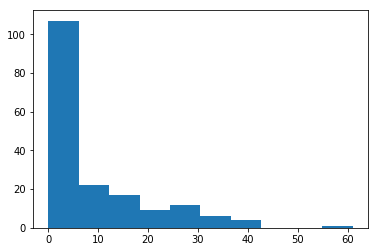

In [438]:
plt.hist(Y)

Oh well that data doesn't quitel look like it will fit well to a straight line does it. Maybe our linear regression isn't so good on that. Fortunately the dataset comes with a logged plant height

(array([ 4.,  6., 16., 18., 13., 25., 25., 25., 28., 18.]),
 array([-1.49214413, -1.16439673, -0.83664934, -0.50890194, -0.18115454,
         0.14659285,  0.47434025,  0.80208765,  1.12983504,  1.45758244,
         1.78532983]),
 <a list of 10 Patch objects>)

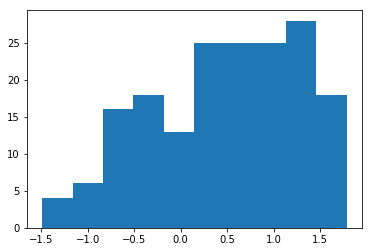

In [440]:
plt.hist(Plants['loght'])

That looks a little beter how about our various explanatory variables?

(array([98., 32., 24., 11.,  3.,  6.,  0.,  2.,  0.,  2.]),
 array([ -71. ,  232.7,  536.4,  840.1, 1143.8, 1447.5, 1751.2, 2054.9,
        2358.6, 2662.3, 2966. ]),
 <a list of 10 Patch objects>)

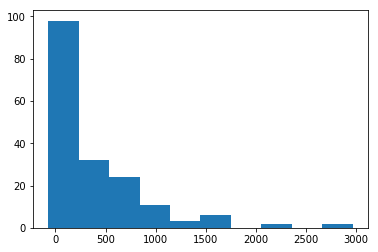

In [447]:
plt.hist(X[:,1])

(array([33., 39., 29., 18., 13.,  8., 22.,  9.,  5.,  2.]),
 array([  73. ,  464.8,  856.6, 1248.4, 1640.2, 2032. , 2423.8, 2815.6,
        3207.4, 3599.2, 3991. ]),
 <a list of 10 Patch objects>)

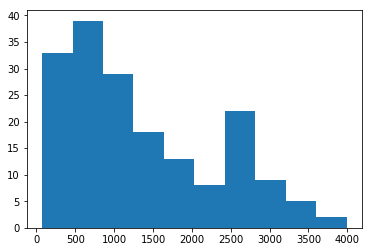

In [449]:
plt.hist(X[:,2])

(array([ 2.,  5.,  6., 10., 15., 14., 21., 29., 23., 53.]),
 array([-11.1 ,  -7.22,  -3.34,   0.54,   4.42,   8.3 ,  12.18,  16.06,
         19.94,  23.82,  27.7 ]),
 <a list of 10 Patch objects>)

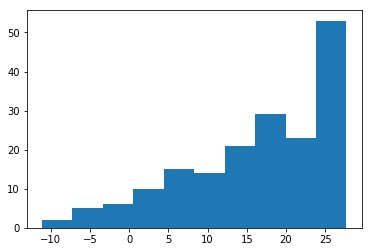

In [448]:
plt.hist(X[:,3])

None of those look particularly helpful to me so its time for you to start exploring. There are 38 variables in the dataset create your own linear regressions with different combinations of variables. The learning rate and the number of iterations you run of gradient descent are hyperparameters and as with all hyperparameters they might need some tuning.